In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

import math
import torch
from torch import nn
from torch import optim
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader

In [2]:
def answer_one(): 
    
    cancer = load_breast_cancer()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)


In [3]:
all_data = answer_one()

In [4]:
all_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
all_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# РАЗБИЕНИЕ И НОРМАЛИЗАЦИЯ

In [6]:
labels = all_data['target'].values
feature_matrix = all_data[all_data.columns[:-1]].values


train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.33, random_state=42)

In [7]:
scaler = StandardScaler()
train_feature_matrix = scaler.fit_transform(train_feature_matrix)
test_feature_matrix = scaler.transform(test_feature_matrix)

In [8]:
train_feature_matrix.std(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [9]:
test_feature_matrix.std(axis = 0)

array([ 0.94847778,  1.03882945,  0.95909168,  0.89150423,  1.05370404,
        1.06359776,  1.02778598,  1.04503941,  1.03026447,  0.91102514,
        0.81605275,  1.14171936,  0.81440503,  0.71352996,  0.84159987,
        0.94794124,  0.95892352,  0.91998125,  1.05119653,  0.94711349,
        0.98027353,  1.04951402,  1.003868  ,  0.94611676,  0.95446426,
        1.12609781,  1.13432764,  1.03727774,  0.92772254,  1.06399677])

# ЛОГИСТИЧЕСКАЯ РЕГРЕСИЯ

In [10]:


lp = np.exp(np.linspace(-5, 5, 11))

lr_clf = LogisticRegression(max_iter=1000)
param_grid = [{'penalty': ['l1', 'l2'],
               'C': lp,
            
              }]

searcher = GridSearchCV(lr_clf, param_grid, cv=5,  verbose=10, n_jobs = 4)
searcher.fit(feature_matrix, labels)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:   11.5s finished
C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': array([  6.73794700e-03,   1.83156389e-02,   4.97870684e-02,
         1.35335283e-01,   3.67879441e-01,   1.00000000e+00,
         2.71828183e+00,   7.38905610e+00,   2.00855369e+01,
         5.45981500e+01,   1.48413159e+02]),
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jo

In [11]:
searcher.best_score_

0.96836555360281196

In [12]:
searcher.best_params_

{'C': 148.4131591025766, 'penalty': 'l1'}

In [13]:

y_ans = searcher.best_estimator_.predict(test_feature_matrix)
print(classification_report(test_labels , y_ans))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87        67
         1.0       0.95      0.89      0.92       121

    accuracy                           0.90       188
   macro avg       0.89      0.90      0.89       188
weighted avg       0.90      0.90      0.90       188



In [14]:
clf = LogisticRegression(max_iter=1000)

clf.fit(train_feature_matrix, train_labels)
y_ans = clf.predict(test_feature_matrix)
print(classification_report(test_labels , y_ans))

C:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        67
         1.0       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



# PYTORCH

## without prior

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.utils.data as utils
from torch.optim import Adam 

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc = nn.Linear(30, 2)
        

    def forward(self, x):
        
        x = self.fc(x)
        return nn.Sigmoid(x)

In [45]:
model = Net()

In [46]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([2, 30]), torch.Size([2])]


In [47]:
x = torch.tensor(train_feature_matrix[:1], dtype=torch.float32)
y = torch.tensor(train_labels[:3], dtype=torch.float32)

In [48]:
y_predicted = model(x)

TypeError: __init__() takes 1 positional argument but 2 were given

In [49]:
y_predicted

NameError: name 'y_predicted' is not defined

In [25]:
param = []
for i in model.parameters():
    param.append(i[0])

NameError: name 'model' is not defined

In [26]:
param[0]

IndexError: list index out of range

In [27]:
crossentropy = -(y*y_predicted.log() + (1-y)*torch.log(1-y_predicted))
loss = crossentropy.mean().unsqueeze(0)

NameError: name 'y_predicted' is not defined

In [34]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 1))
model.add_module('l2', nn.Sigmoid())

In [35]:
X_test = torch.tensor(test_feature_matrix, dtype=torch.float32)
y_test = torch.tensor(test_labels, dtype=torch.float32)

In [36]:
opt = torch.optim.Adam(model.parameters(), lr=3e-4)

In [37]:
def train_model(model ,train_feature_matrix , train_labels , X_test , y_test ):
    history = []
    test_loss = []
    opt = torch.optim.Adam(model.parameters(), lr=3e-4)
    criterion = nn.CrossEntropyLoss()
    for i in range(1000):

        # sample 256 random images
        ix = np.random.randint(0, len(train_feature_matrix), 64)
        x_batch = torch.tensor(train_feature_matrix[ix], dtype=torch.float32)
        y_batch = torch.tensor(train_labels[ix], dtype=torch.float32)

        # predict probabilities
        y_predicted = model(x_batch)[:,0]



        # compute loss on train
        #crossentropy = -(y_batch*y_predicted.log() + (1-y_batch)*torch.log(1-y_predicted))
        #loss = crossentropy.sum().unsqueeze(0)
        loss = criterion(y_predicted, y_batch).item()



        loss.backward()
        opt.step()
        opt.zero_grad() 

        history.append(loss.data.numpy())

        #loss on test
        #y_pre = model(X_test)[:,0]
        
        #cros = -(y_test*y_pre.log() + (1-y_test)*torch.log(1-y_pre))
        with torch.no_grad():
            y_pre = model(X_test)
            cros = criterion(y_pre , y_test ).item()
            test_loss.append(cros.mean().unsqueeze(0).data.numpy())
            if i % 200 == 0:
                print("step #%i | mean loss = %.3f" % (i, np.mean(test_loss[-1:])))
    return {
        'model': model,
        'history': history,
        'test_loss': test_loss
    }

In [38]:

def plot_res(history , test_loss):
    plt.figure(figsize=(8,5))
    plt.plot(history)
    plt.plot(test_loss)
    plt.grid()
    plt.xlabel('Number of iteration')
    plt.ylabel('LOSS')
    plt.show()

In [39]:
def acc(model , test_feature_matrix , test_labels):
    predicted_y_test = model(torch.tensor(test_feature_matrix, dtype=torch.float32))
    predicted_y_test = np.array(predicted_y_test > 0.5).astype('int').reshape(-1)
    accuracy = np.mean(predicted_y_test == test_labels)
    print(accuracy)
    print(classification_report(test_labels , predicted_y_test))

In [40]:
def test(model , train_feature_matrix , train_labels , test_feature_matrix , test_labels):
    X_test = torch.tensor(test_feature_matrix, dtype=torch.float32)
    y_test = torch.tensor(test_labels, dtype=torch.float32)
    m = train_model(model ,train_feature_matrix, train_labels , X_test , y_test )
    plot_res(m['history'] , m['test_loss'])
    acc(m['model'] ,test_feature_matrix ,  test_labels)
    return m

In [41]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 1))
model.add_module('l2', nn.Sigmoid())

In [42]:
m = test(model , train_feature_matrix , train_labels , test_feature_matrix , test_labels)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [43]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 10))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(10, 1))
model.add_module('l4', nn.Sigmoid())
opt = torch.optim.Adam(model.parameters(), lr=3e-4)

In [44]:
m = test(model , train_feature_matrix , train_labels , test_feature_matrix , test_labels)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [423]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 100))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(100, 1))
model.add_module('l4', nn.Sigmoid())
#opt = torch.optim.Adam(model.parameters(), lr=3e-4)

step #0 | mean loss = 42.999
step #200 | mean loss = 11.288
step #400 | mean loss = 5.853
step #600 | mean loss = 5.024
step #800 | mean loss = 3.920


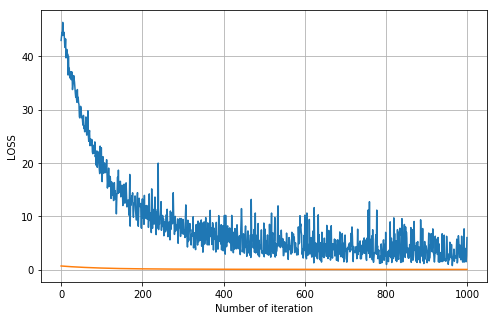

0.984042553191
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        67
         1.0       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [424]:
m =  test(model , train_feature_matrix , train_labels , test_feature_matrix , test_labels)

In [434]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 100))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(100, 100))
model.add_module('l4', nn.ReLU())
model.add_module('l5', nn.Linear(100, 2))
model.add_module('l6', nn.Sigmoid())

In [435]:
m = test(model , train_feature_matrix , train_labels , test_feature_matrix , test_labels)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [430]:
m['history']

[array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([ nan], dtype=float32),
 array([

step #0 | mean loss = 44.503
step #200 | mean loss = nan
step #400 | mean loss = nan
step #600 | mean loss = nan
step #800 | mean loss = nan


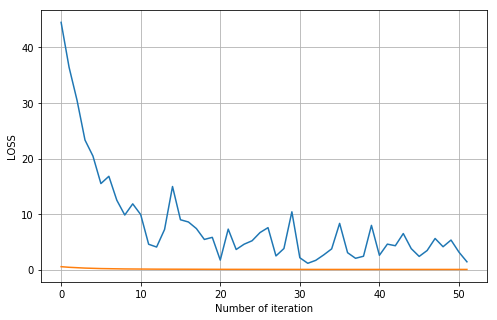

0.356382978723
              precision    recall  f1-score   support

         0.0       0.36      1.00      0.53        67
         1.0       0.00      0.00      0.00       121

    accuracy                           0.36       188
   macro avg       0.18      0.50      0.26       188
weighted avg       0.13      0.36      0.19       188



In [420]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(30, 1000))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(1000, 1000))
model.add_module('l4', nn.ReLU())
model.add_module('l5', nn.Linear(1000, 1))
model.add_module('l6', nn.Sigmoid())
test(model , train_feature_matrix , train_labels , test_feature_matrix , test_labels)

In [224]:
b = list(model.parameters())

In [225]:
m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(30), torch.eye(30))

In [226]:
-m.log_prob(b[0])

tensor([31.0884], grad_fn=<NegBackward>)

## with gausian prior 

In [171]:
m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(30), torch.eye(30))

In [175]:
b = list(model.parameters())


In [173]:
loss = -m.log_prob(b[0])

In [174]:
loss

tensor([27.7581], grad_fn=<NegBackward>)

In [176]:
b[0]

Parameter containing:
tensor([[-0.0690,  0.1117, -0.0162, -0.1667, -0.1223, -0.1299,  0.0983,  0.1711,
         -0.1453,  0.0642, -0.0090,  0.0148,  0.1152, -0.0996, -0.1726,  0.0297,
         -0.1012, -0.0896, -0.0711,  0.1550,  0.1186, -0.1743,  0.1515,  0.0511,
          0.0184,  0.1742, -0.0956,  0.0354,  0.0424,  0.1557]],
       requires_grad=True)

In [324]:
model_gauss = nn.Sequential()
model_gauss.add_module('l1', nn.Linear(30, 1))
model_gauss.add_module('l2', nn.Sigmoid())

In [325]:
opt = torch.optim.Adam(model_gauss.parameters(), lr=3e-4)

In [326]:
history_gauss = []
test_loss_gauss = []
for i in range(10000):
    
    # sample 256 random images
    ix = np.random.randint(0, len(train_feature_matrix), 64)
    x_batch = torch.tensor(train_feature_matrix[ix], dtype=torch.float32)
    y_batch = torch.tensor(train_labels[ix], dtype=torch.float32)
    
    # predict probabilities
    y_predicted = model_gauss(x_batch)[:,0]
    
   
    
    # compute loss on train
    crossentropy = -(y_batch*y_predicted.log() + (1-y_batch)*torch.log(1-y_predicted))
    loss_data = crossentropy.sum().unsqueeze(0)
    
    b = list(model_gauss.parameters())
    loss_prior = -m.log_prob(b[0])
    
    
    loss = loss_data + loss_prior
    
    loss.backward()
    opt.step()
    opt.zero_grad() 
    
    history_gauss.append(loss.data.numpy())
    
    #loss on test
    y_pre = model_gauss(X_test)[:,0]
    cros = -(y_test*y_pre.log() + (1-y_test)*torch.log(1-y_pre)).sum().unsqueeze(0).data.numpy()
    cros += loss_prior.data.numpy()
    test_loss_gauss.append(cros)
    if i % 200 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history_gauss[-10:])))

step #0 | mean loss = 75.245
step #200 | mean loss = 57.214
step #400 | mean loss = 49.015
step #600 | mean loss = 45.815
step #800 | mean loss = 41.999
step #1000 | mean loss = 40.475
step #1200 | mean loss = 38.329
step #1400 | mean loss = 39.691
step #1600 | mean loss = 37.596
step #1800 | mean loss = 37.101
step #2000 | mean loss = 36.868
step #2200 | mean loss = 37.679
step #2400 | mean loss = 37.167
step #2600 | mean loss = 36.062
step #2800 | mean loss = 36.463
step #3000 | mean loss = 36.508
step #3200 | mean loss = 35.581
step #3400 | mean loss = 38.001
step #3600 | mean loss = 36.225
step #3800 | mean loss = 35.227
step #4000 | mean loss = 35.249
step #4200 | mean loss = 35.337
step #4400 | mean loss = 34.999
step #4600 | mean loss = 35.523
step #4800 | mean loss = 34.676
step #5000 | mean loss = 36.040
step #5200 | mean loss = 34.562
step #5400 | mean loss = 35.167
step #5600 | mean loss = 35.222
step #5800 | mean loss = 35.967
step #6000 | mean loss = 35.862
step #6200 | me

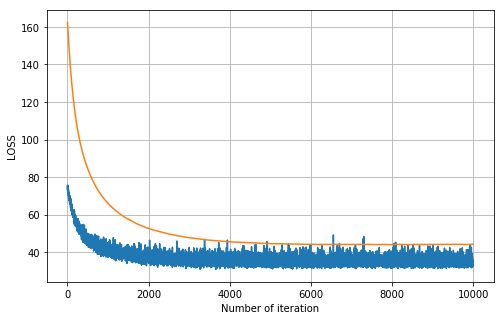

In [327]:

plt.figure(figsize=(8,5))
plt.plot(history_gauss)
plt.plot(test_loss_gauss)
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('LOSS')
plt.show()

In [328]:
predicted_y_test_gauss = model_gauss(torch.tensor(test_feature_matrix, dtype=torch.float32))
predicted_y_test_gauss = np.array(predicted_y_test_gauss > 0.5).astype('int').reshape(-1)

In [329]:
accuracy = np.mean(predicted_y_test_gauss == test_labels)
print(accuracy)

0.989361702128


In [330]:
print(classification_report(test_labels , predicted_y_test_gauss))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        67
         1.0       0.99      0.99      0.99       121

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



# with exponentional prior

In [257]:
E = torch.distributions.exponential.Exponential(1.0)
b = list(model.parameters())
loss = -E.log_prob(b[0])


In [258]:
loss

tensor([[ 7.9413e-41,  1.0240e-40,  7.7373e-41,  9.0366e-41, -6.0187e-41,
         -1.9652e-40,  9.6153e-41,  8.8848e-41, -7.9042e-41, -1.0060e-40,
          1.0279e-40,  2.2439e-40,  8.7067e-41,  9.8064e-41,  1.9624e-40,
         -5.0754e-41, -1.9324e-41,  1.8031e-41, -2.3200e-41, -8.0823e-41,
          8.8514e-41,  1.2141e-40,  9.2008e-41,  8.5636e-41,  8.5950e-41,
         -8.6431e-41,  1.0172e-40,  8.8087e-41,  1.0358e-40, -1.4921e-41]],
       grad_fn=<NegBackward>)

In [259]:
G = torch.distributions.gamma.Gamma(30,1)

In [260]:
b = list(model.parameters())
loss = -G.log_prob(b[0])


In [261]:
loss

tensor([[2748.9407, 2741.5686, 2749.6953, 2745.1936,       nan,       nan,
         2743.3933, 2745.6848,       nan,       nan, 2741.4568, 2718.8181,
         2746.2722, 2742.8225, 2722.7056,       nan,       nan, 2791.9358,
               nan,       nan, 2745.7939, 2736.6294, 2744.6714, 2746.7527,
         2746.6465,       nan, 2741.7607, 2745.9343, 2741.2361,       nan]],
       grad_fn=<NegBackward>)

# MNIST

In [378]:
data = MNIST('mnist', download=True, train=True)
train_data = TensorDataset(data.train_data.view(-1, 28 * 28).float() / 255 )
data = MNIST('mnist', download=True, train=False)
test_data_raw = TensorDataset(data.test_data.view(-1, 28 * 28).float() / 255)

In [363]:
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

In [379]:
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)

In [381]:
train_data[0][0].size()

torch.Size([784])

In [380]:
next(iter(trainloader)).size()

AttributeError: 'list' object has no attribute 'size'

In [337]:
digit_size = 14
train_data.tensors = (nn.AvgPool2d(2, 2)(train_data.tensors[0].view(-1, 28, 28)).data.view(-1, 196), )
test_data_raw.tensors = (nn.AvgPool2d(2, 2)(test_data_raw.tensors[0].view(-1, 28, 28)).data.view(-1, 196), )

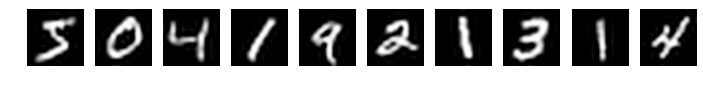

In [348]:
from matplotlib import pyplot as plt
%matplotlib inline
def show_images(x):
    plt.figure(figsize=(12, 12 / 10 * (x.shape[0] // 10 + 1)))
    x = x.view(-1, digit_size, digit_size)
    for i in range(x.shape[0]):
        plt.subplot(x.shape[0] // 10 + 1, 10, i + 1)
        plt.imshow(x.data[i].numpy(), cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
        plt.axis('off')

show_images(train_data[:10][0])

In [353]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [354]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(196, 200))
model.add_module('l2', nn.Linear(200, 200))
model.add_module('l3', nn.Linear(200, 10))
model.add_module('l4', nn.Sigmoid())
model.to(device)

Sequential(
  (l1): Linear(in_features=196, out_features=200, bias=True)
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (l3): Linear(in_features=200, out_features=10, bias=True)
  (l4): Sigmoid()
)

In [355]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [382]:
model.train()
step = 0 
loss_history = []
for epoch in range(1, 12):
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        step += 1
        loss_history.append(loss.item())
        if step % 100  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    scheduler.step()

ValueError: not enough values to unpack (expected 2, got 1)

tensor([0.5243, 0.5347, 0.4802, 0.5251, 0.4815, 0.4942, 0.5105, 0.4837, 0.4932,
        0.4759], grad_fn=<SigmoidBackward>)